In [1]:
import os

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

from pynwb import NWBFile, NWBHDF5IO
from pynwb.ophys import TwoPhotonSeries, OpticalChannel, ImageSegmentation, Fluorescence
from pynwb.device import Device
from nwbwidgets import nwb2widget

import TwoPUtils

%matplotlib inline

In [2]:
# load ophys file from suite2p


f = {'mouse':"GRABDA7",
     'basedir': "/mnt/BigDisk/2P_scratch",
     'date': "08_12_2020",
     'scene':"SingleMorph",
     'sess': 1,
     'scan':4}

f['s2p_dir'] = os.path.join(f['basedir'],f['mouse'],f['date'],f['scene'],
                            "%s_%03d_%03d" % (f['scene'],f['sess'],f['scan']),
                           "suite2p")


In [3]:
io = NWBHDF5IO(os.path.join(f['s2p_dir'],'ophys.nwb'),'r')
nwbfile = io.read()

In [4]:
nwb2widget(nwbfile)

In [19]:
print(dir(nwbfile.acquisition['TwoPhotonSeries']))
print(nwbfile.acquisition['TwoPhotonSeries'].dimension[:])

['_AbstractContainer__children', '_AbstractContainer__container_source', '_AbstractContainer__field_values', '_AbstractContainer__fieldsconf', '_AbstractContainer__gather_fields', '_AbstractContainer__modified', '_AbstractContainer__name', '_AbstractContainer__object_id', '_AbstractContainer__parent', '_Container__smart_str', '_Container__smart_str_dict', '_Container__smart_str_list', '_TimeSeries__add_link', '_TimeSeries__get_links', '_TimeSeries__time_unit', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nwbfields__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_field_spec', '_check_field_spec_keys', '_data_type_attr', '_fieldsname', '_get_fields', '_getter', '_pconf_allowed_k

In [20]:
print(nwbfile.fields)

{'acquisition': {'TwoPhotonSeries': TwoPhotonSeries pynwb.ophys.TwoPhotonSeries at 0x140619096328784
Fields:
  comments: no comments
  conversion: 1.0
  data: None
  description: no description
  dimension: <HDF5 dataset "dimension": shape (2,), type "<i8">
  external_file: <HDF5 dataset "external_file": shape (1,), type "|O">
  format: external
  imaging_plane: ImagingPlane pynwb.ophys.ImagingPlane at 0x140619096330128
Fields:
  conversion: 1.0
  description: standard
  device: Microscope pynwb.device.Device at 0x140619096627216
Fields:
  description: My two-photon microscope
  manufacturer: The best microscope manufacturer

  excitation_lambda: 600.0
  imaging_rate: 15.4609375
  indicator: GCaMP
  location: V1
  optical_channel: (
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  unit: meters

  rate: 15.4609375
  resolution: -1.0
  starting_frame: [0]
  starting_time: 0.0
  starting_time_unit: seconds
}, 'analysis': {}, 'scratch': {}, 'stimulus': {}, 'stimulus_template':

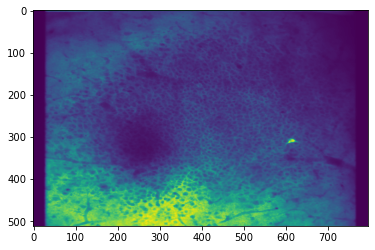

In [38]:
f,ax = plt.subplots()
ax.imshow(nwbfile.processing['ophys'].data_interfaces['Backgrounds_0'].images["meanImg_chan2"][:])



In [56]:
print(nwbfile.processing['ophys'].data_interfaces.keys())
print(nwbfile.processing['ophys'].data_interfaces['Deconvolved'].fields)
# print(nwbfile.processing['ophys'].data_interfaces['Deconvolved'].roi_response_series['Deconvolved'])
# print(nwbfile.processing['ophys'].data_interfaces['Deconvolved'].roi_response_series['Deconvolved'].data.shape)

print(nwbfile.processing['ophys'].data_interfaces['Fluorescence'].fields)

dict_keys(['Backgrounds_0', 'Deconvolved', 'Fluorescence', 'ImageSegmentation', 'Neuropil'])
{'roi_response_series': {'Deconvolved': Deconvolved pynwb.ophys.RoiResponseSeries at 0x139861577140432
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1862, 26456), type "<f4">
  description: no description
  rate: 15.4609375
  resolution: -1.0
  rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
  starting_time: 0.0
  starting_time_unit: seconds
  unit: lumens
}}
{'roi_response_series': {'Fluorescence': Fluorescence pynwb.ophys.RoiResponseSeries at 0x139861577142096
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (1862, 26456), type "<f4">
  description: no description
  rate: 15.4609375
  resolution: -1.0
  rois: rois <class 'hdmf.common.table.DynamicTableRegion'>
  starting_time: 0.0
  starting_time_unit: seconds
  unit: lumens
}}


In [25]:
for attr in dir(nwbfile.acquisition):
    if "__" in attr or attr[0]=="_":
        pass
    else:
        print(attr)

acquisition
add_acquisition
add_analysis
add_child
add_device
add_electrode
add_electrode_column
add_electrode_group
add_epoch
add_epoch_column
add_epoch_metadata_column
add_ic_electrode
add_icephys_electrode
add_imaging_plane
add_invalid_time_interval
add_invalid_times_column
add_lab_meta_data
add_ogen_site
add_processing_module
add_scratch
add_stimulus
add_stimulus_template
add_time_intervals
add_trial
add_trial_column
add_unit
add_unit_column
all_children
analysis
children
container_source
copy
create_device
create_electrode_group
create_electrode_table_region
create_ic_electrode
create_icephys_electrode
create_imaging_plane
create_lab_meta_data
create_ogen_site
create_processing_module
create_time_intervals
data_collection
data_type
devices
ec_electrode_groups
ec_electrodes
electrode_groups
electrodes
epoch_tags
epochs
experiment_description
experimenter
fields
file_create_date
generate_new_id
get_acquisition
get_analysis
get_ancestor
get_device
get_electrode_group
get_fields_conf
